In [143]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import locale
import regex as re

Gráfico de línea de muertes por traumatismos y por respiratorias, de 2016 a 2020

Heat map mes y año

Correlación ruralidad y tasa de mortalidad

Correlación ruralidad y tasa de mortalidad, por región

Connected dot plot, ordenado por ruralidad 

Cloropletico RM 


In [2]:
cols_def=["ANO_DEF","FECHA_DEF","GLOSA_SEXO","EDAD_TIPO","EDAD_CANT","CODIGO_COMUNA_RESIDENCIA",
          "GLOSA_COMUNA_RESIDENCIA","GLOSA_REG_RES","DIAG1","CAPITULO_DIAG1","GLOSA_CAPITULO_DIAG1",
          "CODIGO_GRUPO_DIAG1","GLOSA_GRUPO_DIAG1","CODIGO_CATEGORIA_DIAG1","GLOSA_CATEGORIA_DIAG1",
          "CODIGO_SUBCATEGORIA_DIAG1","GLOSA_SUBCATEGORIA_DIAG1","DIAG2","CAPITULO_DIAG2",
          "GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2","GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2",
          "GLOSA_CATEGORIA_DIAG2","CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2","LUGAR_DEFUNCION"]
defunciones_com = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_15092022.csv", 
                          encoding='latin-1',
                          sep=";",
                         header=None,
                         names=cols_def)

defunciones_com = defunciones_com[(defunciones_com['CODIGO_COMUNA_RESIDENCIA']!=99999)]
defunciones_com = defunciones_com[defunciones_com.ANO_DEF.isin([2016,2017,2018,2019,2020,2021])]
defunciones_com.loc[defunciones_com.GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales', 'GLOSA_CAPITULO_DIAG1'] = 'Enfermedades del sistema respiratorio '
defunciones_com = defunciones_com[(defunciones_com['GLOSA_CAPITULO_DIAG1']=='Enfermedades del sistema respiratorio ') | (defunciones_com['GLOSA_CAPITULO_DIAG1']=='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas')]
defunciones_com = defunciones_com[['CODIGO_COMUNA_RESIDENCIA','ANO_DEF','GLOSA_COMUNA_RESIDENCIA','GLOSA_CAPITULO_DIAG1','FECHA_DEF']]
defunciones_com = (defunciones_com.groupby(by=['CODIGO_COMUNA_RESIDENCIA','GLOSA_COMUNA_RESIDENCIA','ANO_DEF','GLOSA_CAPITULO_DIAG1'])
               .count()
               .reset_index()
               .rename(columns = {'CODIGO_COMUNA_RESIDENCIA':'Comuna',
                                  'GLOSA_COMUNA_RESIDENCIA' : 'Glosa Comuna',
                                  'GLOSA_CAPITULO_DIAG1':'causa',
                                  'ANO_DEF':'anio',
                                  'FECHA_DEF':'n_def'}))

proy_pob_com = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_com = (proy_pob_com[['Comuna','Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021'
               
           }))
proy_pob_com = (pd.melt(proy_pob_com,id_vars='Comuna',
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob'
           })
           .groupby(['Comuna','anio'])
           .sum()
           .reset_index())

proy_pob_com_rur = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_com_rur = (proy_pob_com_rur[['Comuna','Area (1=Urbano 2=Rural)','Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021',
                              'Area (1=Urbano 2=Rural)':'area'
               
           }))
proy_pob_com_rur = (pd.melt(proy_pob_com_rur,id_vars=['Comuna','area'],
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob_rur'
           })
           .groupby(['Comuna','anio','area'])
           .sum()
           .reset_index())
proy_pob_com_rur = proy_pob_com_rur[proy_pob_com_rur['area']==2]

proy_pob_com['anio'] = proy_pob_com['anio'].astype('int64')
proy_pob_com_rur['anio'] = proy_pob_com_rur['anio'].astype('int64')

tasa_def_com = (defunciones_com.merge(proy_pob_com,how='left',on=['Comuna','anio'])
.merge(proy_pob_com_rur[['Comuna','anio','pob_rur']],how='left',on=['Comuna','anio']))
tasa_def_com['tasa_def_com'] = tasa_def_com['n_def']/tasa_def_com['pob']*100000
tasa_def_com['tasa_rur'] = tasa_def_com['pob_rur']/tasa_def_com['pob']*100


In [3]:
cols_def=["ANO_DEF","FECHA_DEF","GLOSA_SEXO","EDAD_TIPO","EDAD_CANT","CODIGO_COMUNA_RESIDENCIA",
          "GLOSA_COMUNA_RESIDENCIA","GLOSA_REG_RES","DIAG1","CAPITULO_DIAG1","GLOSA_CAPITULO_DIAG1",
          "CODIGO_GRUPO_DIAG1","GLOSA_GRUPO_DIAG1","CODIGO_CATEGORIA_DIAG1","GLOSA_CATEGORIA_DIAG1",
          "CODIGO_SUBCATEGORIA_DIAG1","GLOSA_SUBCATEGORIA_DIAG1","DIAG2","CAPITULO_DIAG2",
          "GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2","GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2",
          "GLOSA_CATEGORIA_DIAG2","CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2","LUGAR_DEFUNCION"]
defunciones_nac = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_15092022.csv", 
                          encoding='latin-1',
                          sep=";",
                         header=None,
                         names=cols_def)

defunciones_nac = defunciones_nac[(defunciones_nac['CODIGO_COMUNA_RESIDENCIA']!=99999)]
defunciones_nac = defunciones_nac[defunciones_nac.ANO_DEF.isin([2016,2017,2018,2019,2020,2021])]
defunciones_nac.loc[defunciones_nac.GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales', 'GLOSA_CAPITULO_DIAG1'] = 'Enfermedades del sistema respiratorio '
defunciones_nac = defunciones_nac[(defunciones_nac['GLOSA_CAPITULO_DIAG1']=='Enfermedades del sistema respiratorio ') | (defunciones_nac['GLOSA_CAPITULO_DIAG1']=='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas')]
defunciones_nac = defunciones_nac[['ANO_DEF','GLOSA_CAPITULO_DIAG1','FECHA_DEF']]
defunciones_nac = (defunciones_nac.groupby(by=['ANO_DEF','GLOSA_CAPITULO_DIAG1'])
               .count()
               .reset_index()
               .rename(columns = {'GLOSA_CAPITULO_DIAG1':'causa',
                                  'ANO_DEF':'anio',
                                  'FECHA_DEF':'n_def'}))

proy_pob_nac = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_nac = (proy_pob_nac[['Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021'
               
           }))
proy_pob_nac = (pd.melt(proy_pob_nac,
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob'
           })
           .groupby(['anio'])
           .sum()
           .reset_index())
proy_pob_nac['anio'] = proy_pob_nac['anio'].astype('int64')

tasa_def_nac = (defunciones_nac.merge(proy_pob_nac,how='left',on=['anio']))
tasa_def_nac['tasa_def_nac'] = tasa_def_nac['n_def']/tasa_def_nac['pob']*100000


In [4]:
tab1 = tasa_def_nac.pivot_table(values="tasa_def_nac",index=["causa"],columns = "anio",aggfunc=sum)

In [5]:
tab1

anio,2016,2017,2018,2019,2020,2021
causa,,,,,,
Enfermedades del sistema respiratorio,54.202237,58.96567,65.211114,72.558975,165.029748,196.586474
"Traumatismos, envenenamientos y algunas otras consecuencias de causas externas",42.786025,41.14187,41.106253,42.209184,40.332382,39.540891


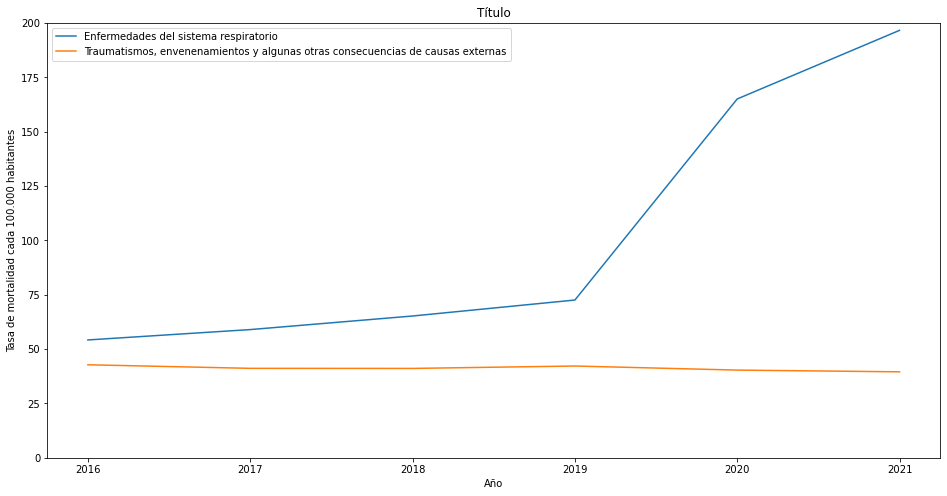

In [6]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in tab1.index:
    tab1.loc[year].plot.line(ax=ax)

plt.title("Título") 
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad cada 100.000 habitantes")
plt.legend()
plt.ylim(0, 200)

plt.show()

In [186]:
cols_def=["ANO_DEF","FECHA_DEF","GLOSA_SEXO","EDAD_TIPO","EDAD_CANT","CODIGO_COMUNA_RESIDENCIA",
          "GLOSA_COMUNA_RESIDENCIA","GLOSA_REG_RES","DIAG1","CAPITULO_DIAG1","GLOSA_CAPITULO_DIAG1",
          "CODIGO_GRUPO_DIAG1","GLOSA_GRUPO_DIAG1","CODIGO_CATEGORIA_DIAG1","GLOSA_CATEGORIA_DIAG1",
          "CODIGO_SUBCATEGORIA_DIAG1","GLOSA_SUBCATEGORIA_DIAG1","DIAG2","CAPITULO_DIAG2",
          "GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2","GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2",
          "GLOSA_CATEGORIA_DIAG2","CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2","LUGAR_DEFUNCION"]
defunciones_mes = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_15092022.csv", 
                          encoding='latin-1',
                          sep=";",
                         header=None,
                         names=cols_def)
defunciones_mes = defunciones_mes[(defunciones_mes['CODIGO_COMUNA_RESIDENCIA']!=99999)]
defunciones_mes = defunciones_mes[defunciones_mes.ANO_DEF.isin([2016,2017,2018,2019,2020,2021])]
defunciones_mes.loc[defunciones_mes.GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales', 'GLOSA_CAPITULO_DIAG1'] = 'Enfermedades del sistema respiratorio '
defunciones_mes = pd.DataFrame(defunciones_mes[(defunciones_mes['GLOSA_CAPITULO_DIAG1']=='Enfermedades del sistema respiratorio ') | (defunciones_mes['GLOSA_CAPITULO_DIAG1']=='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas')])
defunciones_mes['fecha'] = pd.to_datetime(defunciones_mes['FECHA_DEF'], format='%Y-%m-%d')
defunciones_mes['mes'] = defunciones_mes['fecha'].dt.strftime('%m')

In [187]:
defunciones_mes_ce = defunciones_mes[defunciones_mes['GLOSA_CAPITULO_DIAG1']=='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas']
defunciones_mes_ce = defunciones_mes_ce[['ANO_DEF','mes','FECHA_DEF']]
defunciones_mes_ce = defunciones_mes_ce.groupby(by=['ANO_DEF','mes']).count().reset_index()
defunciones_mes_ce = (defunciones_mes_ce.pivot_table(values='FECHA_DEF',index=["mes"], columns = "ANO_DEF",aggfunc=sum).dropna())

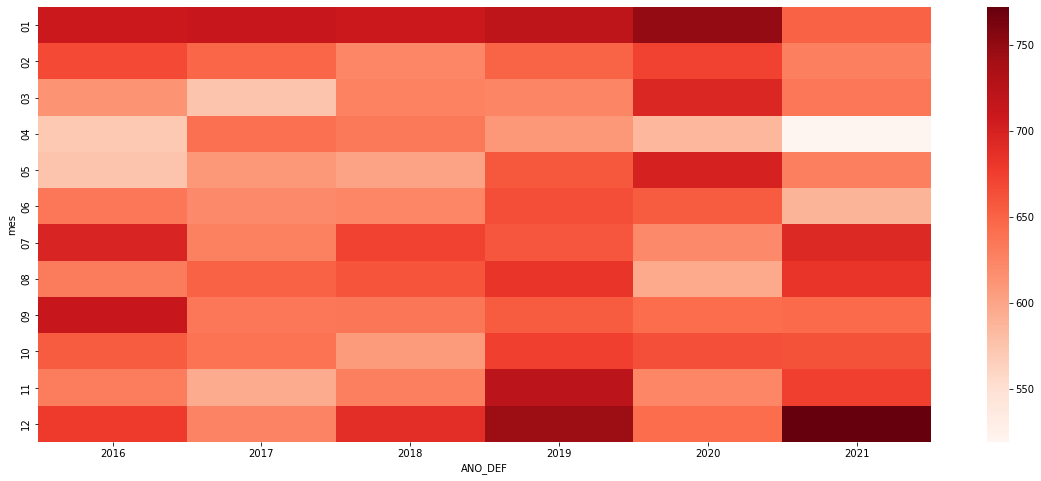

In [195]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
sns.heatmap(defunciones_mes_ce, ax=ax, cmap='Reds')
plt.show()

In [190]:
defunciones_mes_res = defunciones_mes[defunciones_mes['GLOSA_CAPITULO_DIAG1']=='Enfermedades del sistema respiratorio ']
defunciones_mes_res = defunciones_mes_res[['ANO_DEF','mes','FECHA_DEF']]
defunciones_mes_res = defunciones_mes_res.groupby(by=['ANO_DEF','mes']).count().reset_index()
defunciones_mes_res = (defunciones_mes_res.pivot_table(values='FECHA_DEF',index=["mes"], columns = "ANO_DEF",aggfunc=sum).dropna())

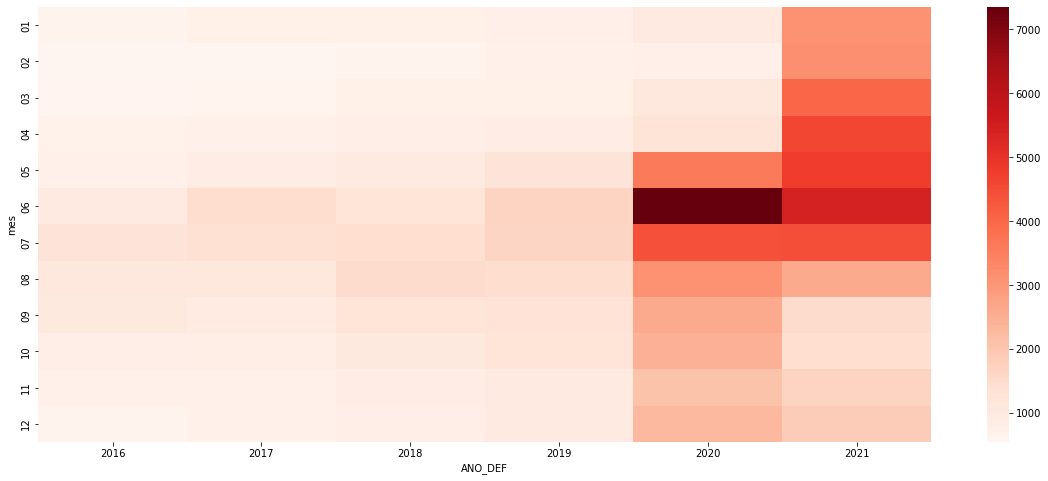

In [196]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
sns.heatmap(defunciones_mes_res, ax=ax, cmap='Reds')
plt.show()

In [73]:
tasa_def_com_2017_2021 = tasa_def_com[(tasa_def_com["anio"]==2017) | (tasa_def_com["anio"]==2021)]
tasa_def_com_2017_2021 = tasa_def_com_2017_2021[tasa_def_com_2017_2021['causa']=='Enfermedades del sistema respiratorio ']
tasa_def_com_2017_2021.loc[tasa_def_com_2017_2021.anio == 2017, 'anio'] ='anio_2017'
tasa_def_com_2017_2021.loc[tasa_def_com_2017_2021.anio == 2021, 'anio'] ='anio_2021'
tab3 = (tasa_def_com_2017_2021
        .pivot_table("tasa_def_com",index=["Glosa Comuna"], columns = "anio",aggfunc=sum).dropna())
tab3['delta'] = tab3["anio_2021"] / tab3["anio_2017"] - 1

In [84]:

plt.figure(figsize=(100,150))

y_range = np.arange(1, len(tab3.index) + 1)
colors = np.where(tab3['anio_2021'] > tab3['anio_2017'], '#d9d9d9', '#d57883')

plt.hlines(y=y_range, xmin=tab3['anio_2017'], xmax=tab3['anio_2021'],
           color=colors, lw=20)
plt.scatter(tab3['anio_2017'], y_range, color='#0096d7', s=200, label='2017', zorder=3)
plt.scatter(tab3['anio_2021'], y_range, color='#003953', s=200 , label='2021', zorder=3)

plt.yticks(y_range, tab3.index,fontsize=40)
plt.title("prueba", loc='left',fontsize=50)
plt.xlim(0, 1450)
plt.gcf().subplots_adjust(left=0.85)
plt.tight_layout()
for (_, row), y in zip(tab3.iterrows(), y_range):
    plt.annotate(f"{row['delta']:+.0%}", (max(row["anio_2017"], row["anio_2021"]) + 4, y - 0.25))
plt.legend(ncol=1, bbox_to_anchor=(1., 0.45, 0.2, 0.2), loc='upper center', frameon=True)
plt.show()
